# Learning from data and related challenges and linear models for regression

## Question 01 - Data Preprocessing

<StemContainer object of 3 artists>

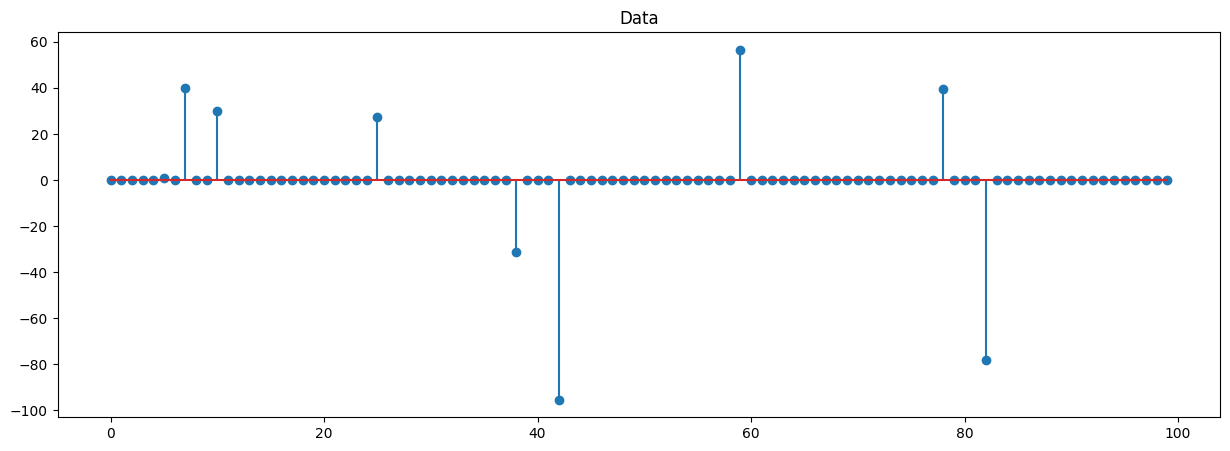

In [1]:
#plotting the signal
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 50*np.random.randn(num_nonzero)  
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100  # Total length of the signal
num_nonzero = 10    # Number of non-zero elements in the signal
your_index_no=200242 # Enter without english letter and without leading zeros
signal = generate_signal(signal_length, num_nonzero)
signal[10] = (your_index_no % 10)*10 + 10
if  your_index_no % 10 == 0:
  signal[10] = np.random.randn(1) + 30


signal=signal.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data")
plt.stem(signal)


In [2]:
#MaxAbs Scaler
from sklearn import preprocessing

max_abs_scaler = preprocessing.MaxAbsScaler()
max_abs_signal = max_abs_scaler.fit_transform(signal)



In [3]:
#MinMax Scaler
def min_max_scale(data):
    min_val = np.min(data)
    max_val = np.max(data)
    print("min of data", min_val, "max of data", max_val)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data


scaled_data_min_max = min_max_scale(signal)

min of data -95.37084226390746 max of data 56.5537734242311


In [4]:
#Standard Normalization
def standard_normalizing(data):
    mean = np.mean(data)
    std = np.std(data)
    print("mean of data", mean, "std of data", std)
    standardized_data = (data - mean) / std
    return standardized_data
    
scaled_starndardized_data = standard_normalizing(signal)

mean of data -0.10726168005023076 std of data 15.534558496842799


<StemContainer object of 3 artists>

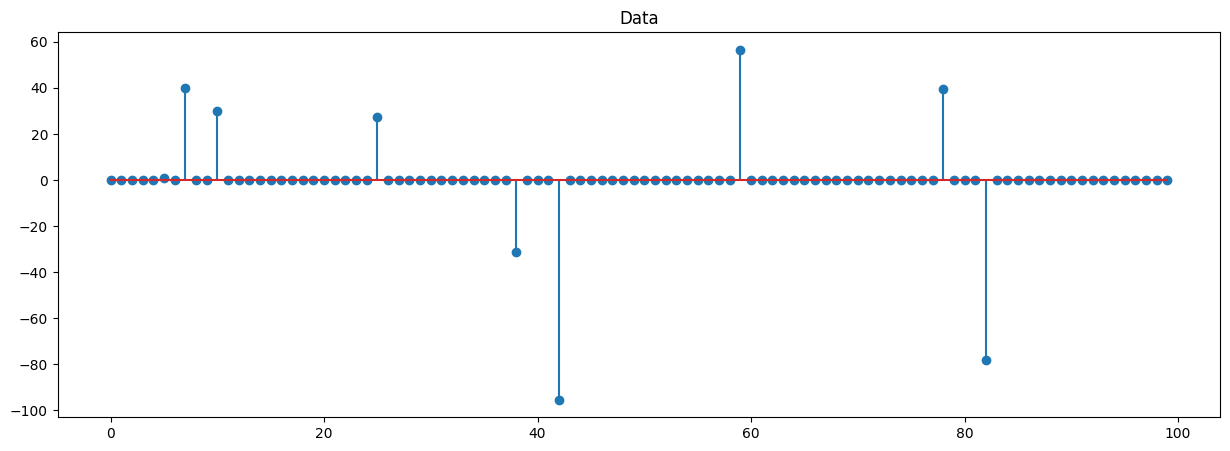

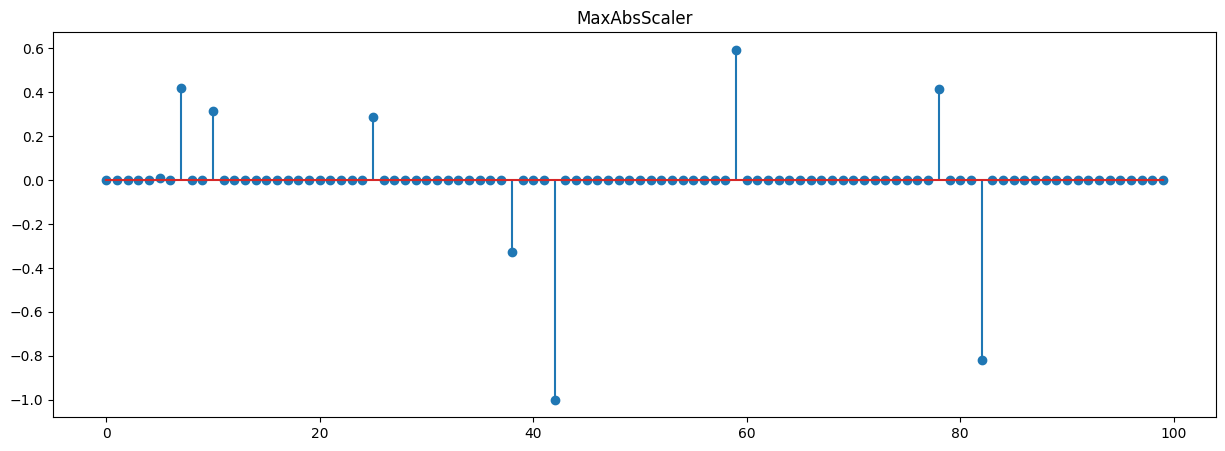

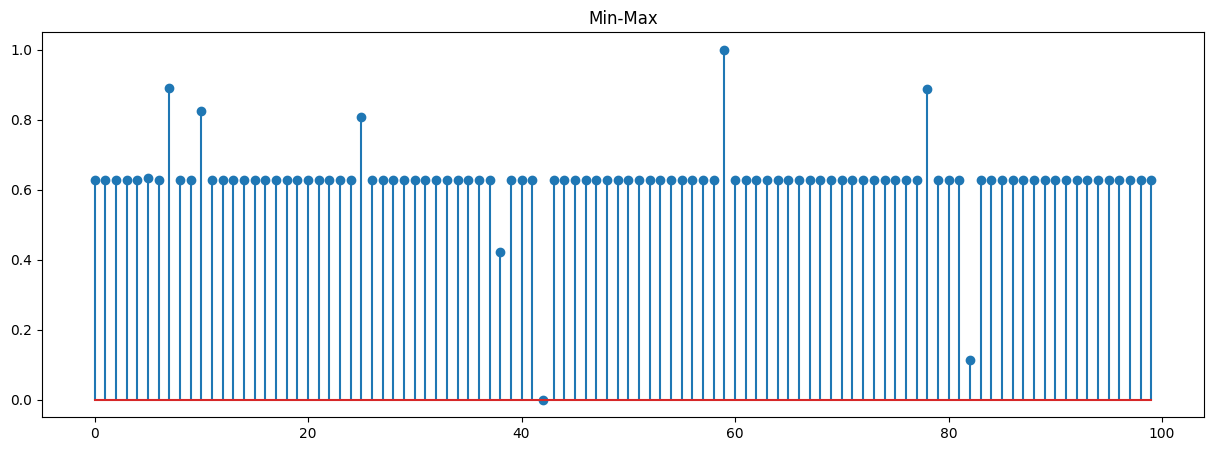

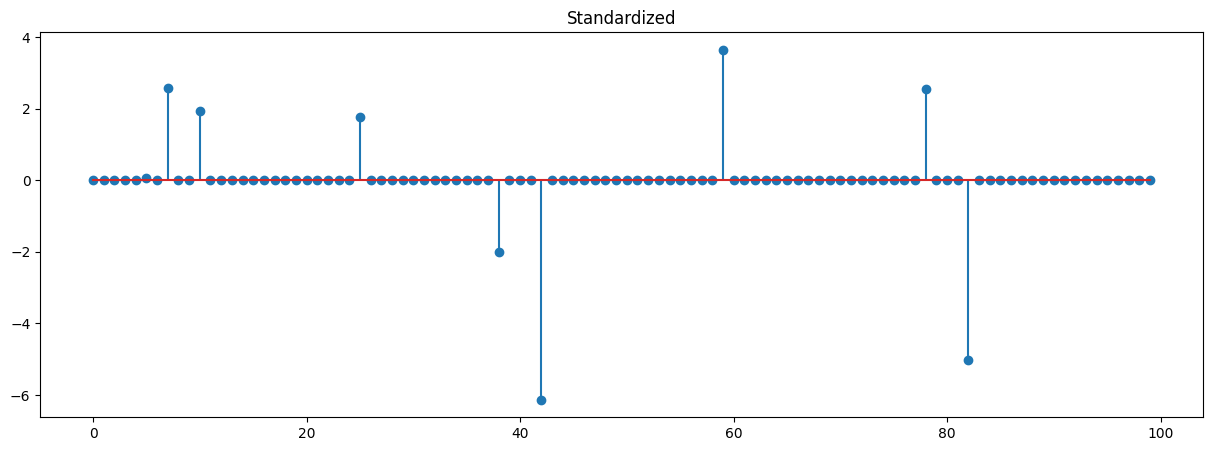

In [5]:
#plotting the signal and scaled signals
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title('Data')
plt.stem(signal)

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title('MaxAbsScaler')
plt.stem(max_abs_signal)

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title('Min-Max')
plt.stem(scaled_data_min_max)

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title('Standardized')
plt.stem(scaled_starndardized_data)

In [6]:
#counting the number of non zero values
print('non zero values of signal', np.count_nonzero(signal))
print('non zero values of max_abs_signal', np.count_nonzero(max_abs_signal))
print('non zero values of scaled_data_min_max', np.count_nonzero(scaled_data_min_max))
print('non zero values of scaled_starndardized_data', np.count_nonzero(scaled_starndardized_data))


non zero values of signal 10
non zero values of max_abs_signal 10
non zero values of scaled_data_min_max 99
non zero values of scaled_starndardized_data 100


#### **Explanation**
- Min max normalization
    - Min max normalization scales signal between 0 and 1. It maps the minimum value to zero and maximum value to one. It preserves the relative ordering and patterns of values. It will distribute data only on the positive side.
- Max absolute normalization
    - Max absolute normalization scales signal between -1 and 1. It maps the minimum value to -1 and maximum value to one while preserving the relative ordering  and patterns of values. It also does not change the shape of data distribution.
- standard normalization
    - Standard normalization scales signal to have zero mean and unit variance. It standardized the data to have zero mean and unit varince.It does not chnage strucure of data but can make patterns more apperent like Guassian distribution. It also reduce the impcat of outliers.

In all scaling methods, the relative ordering and shape are preserved. Major different is the range of values. It can be clearly seen original signal is a sparse signal. It only has 11 non zero elements. Except Max absolute normalization, other two scaling methods eliminates the sparsity. Only Max absolute normalization preserves the sparsity. Therfore Max absolute normalization is suitable method for this signal.

## Question 02 - Linear Regression

In [7]:
#reading the data
import pandas as pd

advertising_data = pd.read_csv('Advertising.csv')
print(advertising_data.shape)
print(advertising_data.head())
advertising_data.describe()

(200, 5)
   sample index     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9


,sample index,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
#identifying the features and target
data_x = advertising_data[['TV', 'radio', 'newspaper']]
data_y = advertising_data['sales']

print('data_x shape', data_x.shape)
print('data_y shape', data_y.shape)


data_x shape (200, 3)
data_y shape (200,)


In [9]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=100)

print('train_x shape', train_x.shape)
print('train_y shape', train_y.shape)
print('test_x shape', test_x.shape)
print('test_y shape', test_y.shape)


train_x shape (160, 3)
train_y shape (160,)
test_x shape (40, 3)
test_y shape (40,)


In [10]:
#fitting the linear regression model
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()
linear_regression_model.fit(train_x, train_y)

print('intercept', linear_regression_model.intercept_)
print('coefficients', linear_regression_model.coef_)
print('feature names', data_x.columns)

predicted_y_train = linear_regression_model.predict(train_x)
predicted_y_test = linear_regression_model.predict(test_x)

print('sales = {:.3f} + {:.3f}*TV + {:.3f}*radio + {:.3f}*newspaper'.format(linear_regression_model.intercept_, linear_regression_model.coef_[0], linear_regression_model.coef_[1], linear_regression_model.coef_[2]))


intercept 2.8172751352949987
coefficients [0.0455864  0.18569816 0.00223281]
feature names Index(['TV', 'radio', 'newspaper'], dtype='object')
sales = 2.817 + 0.046*TV + 0.186*radio + 0.002*newspaper


In [11]:
#stats for train data
print('Stat for train data\n')
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import t
import numpy as np  

mse = mean_squared_error(train_y, predicted_y_train)
print('Mean Squared Error', mse)
r_squared = r2_score(train_y, predicted_y_train)
print('R squared', r_squared)
n = len(train_x)

rss = np.sum((train_y - predicted_y_train)**2)
print('Residual Sum of Squares', rss)
rse = np.sqrt(rss/(n-4))
print('Residual Standard Error', rse)

sigma2 = np.var(train_y - predicted_y_train)

for feature in train_x.columns:
    print('\nFor feature', feature)
    se2 = sigma2/np.sum((train_x[feature]-np.mean(train_x[feature]))**2)
    se = np.sqrt(se2)
    print('Standard Error', se)
    t_stat = linear_regression_model.coef_[train_x.columns.get_loc(feature)]/se
    print('t-statistic', t_stat)
    p_value = t.sf(np.abs(t_stat), n-4)
    print('p-value', p_value)

Stat for train data

Mean Squared Error 3.069113644649786
R squared 0.89152823018429
Residual Sum of Squares 491.0581831439658
Residual Standard Error 1.774206545559866

For feature TV
Standard Error 0.001525037410199081
t-statistic 29.891986005161833
p-value 9.208929360691334e-67

For feature radio
Standard Error 0.009341300366740532
t-statistic 19.879262005202992
p-value 6.566598675820523e-45

For feature newspaper
Standard Error 0.006213988039401631
t-statistic 0.35932000944660164
p-value 0.3599208046658763


In [12]:
#using statsmodel
import statsmodels.api as sm

x_train_with_constant = sm.add_constant(train_x)
ols_model = sm.OLS(train_y, x_train_with_constant)
ols_result = ols_model.fit()

print(ols_result.summary())



                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     427.4
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           5.38e-75
Time:                        16:21:26   Log-Likelihood:                -316.74
No. Observations:                 160   AIC:                             641.5
Df Residuals:                     156   BIC:                             653.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8173      0.357      7.881      0.0

In [13]:
#stats for test data
print('Stat for test data\n')
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import t
import numpy as np  

mse = mean_squared_error(test_y, predicted_y_test)
r_squared = r2_score(test_y, predicted_y_test)
rss = np.sum(np.square(test_y - predicted_y_test))
rse = np.sqrt(np.sum(np.square(test_y - predicted_y_test)) / (len(test_y) - 4))

print('mean squared error', mse)
print('r-squared', r_squared)
print('residual sum of squares', rss)
print('residual standard error', rse)

sigma2 = np.var(test_y - predicted_y_test)

for feature in data_x.columns:
    print('\n',feature)
    se2 = sigma2/np.sum(np.square(test_x[feature] - np.mean(test_x[feature])))
    print('standard error of', feature, 'is', np.sqrt(se2))

    t_stat = linear_regression_model.coef_[test_x.columns.get_loc(feature)] / np.sqrt(se2)
    print('t-statistic of', feature, 'is', t_stat)
    p_val = t.sf(np.abs(t_stat), len(test_y) - 4)
    print('p-value of', feature, 'is', p_val)



Stat for test data

mean squared error 1.7332927815807735
r-squared 0.9184369032278497
residual sum of squares 69.33171126323094
residual standard error 1.3877610991892955

 TV
standard error of TV is 0.0031304864092855846
t-statistic of TV is 14.562081083566357
p-value of TV is 5.800683511699227e-17

 radio
standard error of radio is 0.012740230453578884
t-statistic of radio is 14.575729861116365
p-value of radio is 5.635086603478783e-17

 newspaper
standard error of newspaper is 0.010040087810348137
t-statistic of newspaper is 0.22238951323887293
p-value of newspaper is 0.41263378745741336


In [14]:
#One may argue that possibly, allocating 25,000 dollars both television advertisingand radio advertising individually (i.e., 25,000 dollars for TV and 25,000 dollars for radio) yields higher sales compared to investing 50,000 dollars in either television
#or radio advertising individually. Try to answer this question using the linear regression model that was built.

W = np.concatenate((linear_regression_model.intercept_.reshape(1,1), linear_regression_model.coef_.reshape(3,1)))

X_1 = np.array([1,25000,25000,0]).reshape(4,1)
X_2 = np.array([1,50000,0,0]).reshape(4,1) #TV
X_3 = np.array([1,0,50000,0]).reshape(4,1) #radio

print('Sales for X_1', np.matmul(W.T, X_1)[0][0])
print('Sales for X_2', np.matmul(W.T, X_2)[0][0])
print('Sales for X_3', np.matmul(W.T, X_3)[0][0])




Sales for X_1 5784.93113470412
Sales for X_2 2282.1371212862537
Sales for X_3 9287.725148121986


#### **Explanation**
- Relationship between sales and advertising budget is 'sales = 2.817 + 0.046*TV + 0.186*radio + 0.002*newspaper' .

- Since coeffient of radio is the maximum and has a lesser p value, it is hightly contributes to the sales. While newspaper has the least contribution to the sales.

- Sales for X_1 5784.93113470412<br>
Sales for X_2 2282.1371212862537<br>
Sales for X_3 9287.725148121986<br>
<br>Based on the above results it is clear that X_3 has the highest sales. It is achived by sepending 50000 dollors only on radio. Therefore argument which says allocating 25,000 dollars both television advertising and radio advertising individually (i.e., 25,000 dollars for TV and 25,000 dollars for radio) yields higher sales compared to investing 
50,000 dollars in either television or radio advertising individually is false.

## Question 03 - Linear Regression Impact On Outliers

Model is y = 3.92 + -3.56x


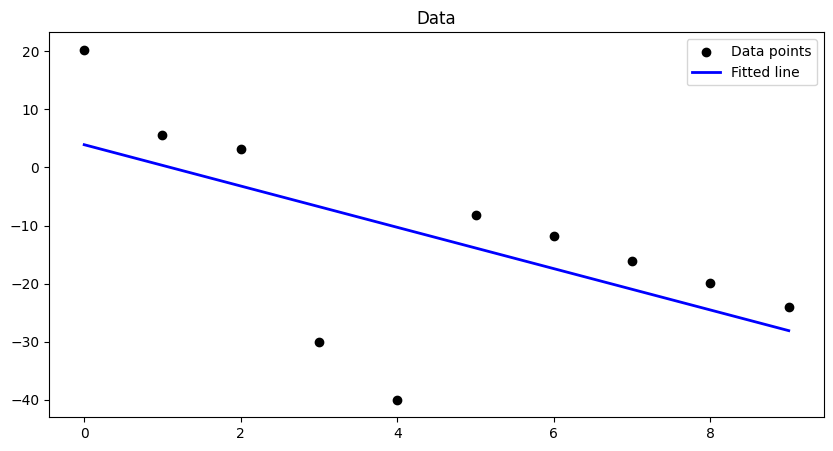

In [15]:
#implementing the linear regression model and plotting the data
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x = np.array([0,1,2,3,4,5,6,7,8,9]).reshape(-1,1)
y = np.array([20.26,5.61,3.14,-30.00,-40.00,-8.13,-11.73,-16.08,-19.95,-24.03]).reshape(-1,1)



model = LinearRegression()
model = model.fit(x,y)

print('Model is y = {:.2f} + {:.2f}x'.format(model.intercept_[0], model.coef_[0][0]))

plt.figure(figsize=(10,5))
plt.subplot(1, 1, 1)
plt.title('Data')
plt.scatter(x,y, color='black', label='Data points')
plt.plot(x, model.predict(x), color='blue', linewidth=2 , label='Fitted line')
plt.legend()


Loss for Linear Model With Robust Estimator is 0.44
Loss for Linear Regression Model is 0.97


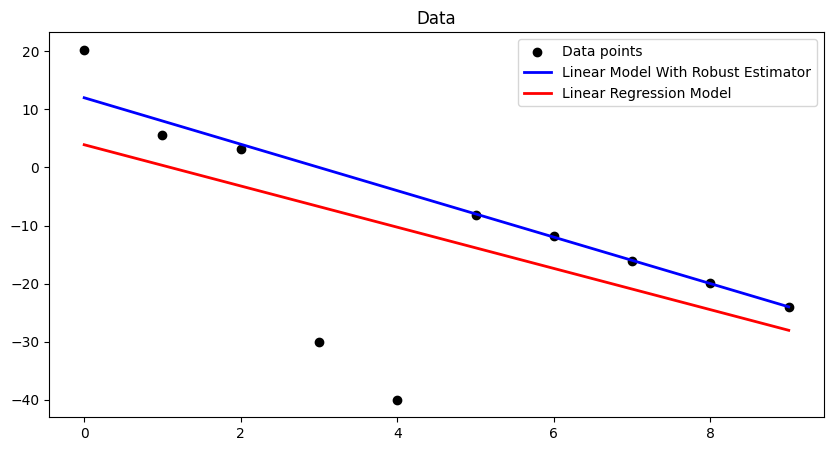

In [16]:
#understanding effect of outliers using robust estimator
def loss_function(x,y,theta,beta):
    ones = np.ones((x.shape[0],1))
    x = np.concatenate((ones,x),axis=1)
    y_hat = np.dot(x,theta)
    loss = np.sum(np.sum(((y-y_hat)**2)/((y-y_hat)**2 + beta**2)))/x.shape[0]

    return loss, y_hat

theta_1 = np.array([12,-4]).reshape(2,1)
theta_2 = np.array([3.91,-3.55]).reshape(2,1)
beta = 1

print('Loss for Linear Model With Robust Estimator is {:.2f}'.format(loss_function(x,y,theta_1,beta)[0]))
print('Loss for Linear Regression Model is {:.2f}'.format(loss_function(x,y,theta_2,beta)[0]))

y_hat_1 = loss_function(x,y,theta_1,beta)[1]
y_hat_2 = loss_function(x,y,theta_2,beta)[1]

plt.figure(figsize=(10,5))
plt.subplot(1, 1, 1)
plt.title('Data')
plt.scatter(x,y, color='black', label='Data points')
plt.plot(x, y_hat_1, color='blue', linewidth=2 , label='Linear Model With Robust Estimator')
plt.plot(x, y_hat_2, color='red', linewidth=2 , label='Linear Regression Model')
plt.legend()



    

#### **Explanation**
- Loss for Linear Model With Robust Estimator is 0.44<br>
Loss for Linear Regression Model is 0.97<br>

- According to above results Linear Model With Robust Estimator is better than Linear Regression Model because it has lower loss value.

- Robust estimates reduce the influence of outliers by altering way they calculate estimators or downweighting extreme values(outliers). In the given robust estimator uses alternate method for calculating estimators rather than using OLS(ordinary least squares) method. Therefore it is less sensitive to outliers.<br>
Techniques like RANSAC (Random Sample Consensus) work by iteratively fitting models to subsets of data, identifying inliers, and updating the model. Outliers are less likely to be selected in multiple iterations, effectively reducing their impact on the final estimate.<br>

- Beta is a hyperparameter in this robust estimator. If we choose smaller beta value it is similar to OLS(ordinary least squares) method. Rather than less sensitive to outliers, it will try to fit the line to all the data points with the aim of minimizing loss.<br>
If we choose fare enough beta value it will be less sensitive to outliers because then the denomitor will be more dominated by beta^2 while downweighting the squred difference term. Threfore it will not try to fit the line to all the data points and reduce the squared difference.Threfore it will reduce the impact of outliers. <br>
As well as if we choose very large beta value it may overly surpress impact of all data points. Then model will result incorrect predictions.<br>